In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random

# Load Dataset

In [2]:
# Find the current working directory and the datasets directory.
current_working_directory = os.getcwd()

dataset_directory = current_working_directory + "\DataSets"

In [3]:
# Load my csv data to a data frame.
bank_data_df = pd.read_csv(dataset_directory + '\\bank-additional-full.csv', sep = ";")
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Understanding

### Missing Values

In [4]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# A list with every column name
column_name_list = list(bank_data_df.columns)

number_of_missing_values_list = []

def get_number_of_missing_values(column_name):
    result = bank_data_df[column_name].value_counts()
    if ('unknown' in result):
        number_of_missing_values_list.append(result['unknown'])
    else:
        number_of_missing_values_list.append(0)

In [6]:
for column_name in column_name_list:
    get_number_of_missing_values(column_name)

number_of_missing_values_dict = {
    'Column name': column_name_list,
    '# of missing values': number_of_missing_values_list
}

In [7]:
# creating a Dataframe object 
missing_values_df = pd.DataFrame(number_of_missing_values_dict)
missing_values_df

,Column name,# of missing values
0,age,0
1,job,330
2,marital,80
3,education,1731
4,default,8597
5,housing,990
6,loan,990
7,contact,0
8,month,0
9,day_of_week,0


In our data, missing values is the value "unknown" in the categorical attributes, so job has 330 missing values, marital has 1731, default has 8597, housing has 990 and loan has 990.as they are shown in the screenshot below:

### Outliers

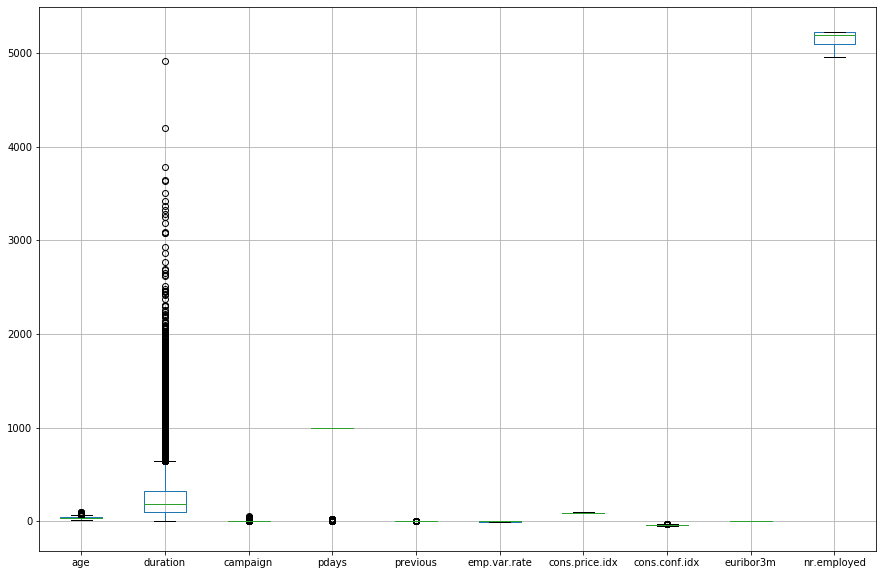

In [8]:
boxplot = bank_data_df.boxplot(grid = True, figsize = (15, 10))

We have 10 numerical attributes so we are going to examine only those.

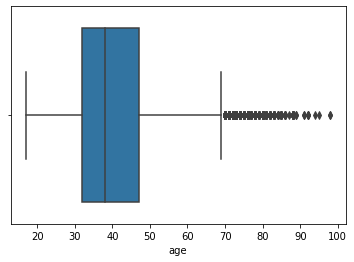

In [9]:
ax = sns.boxplot(x = bank_data_df["age"])

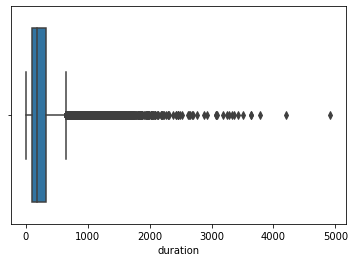

In [10]:
ax = sns.boxplot(x = bank_data_df["duration"])

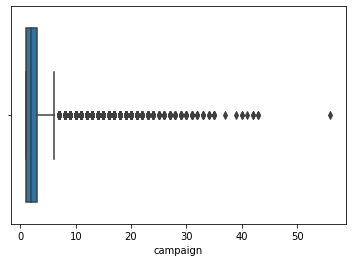

In [11]:
ax = sns.boxplot(x = bank_data_df["campaign"])

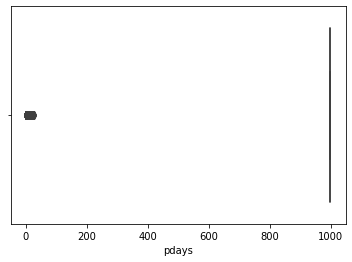

In [12]:
ax = sns.boxplot(x = bank_data_df["pdays"])

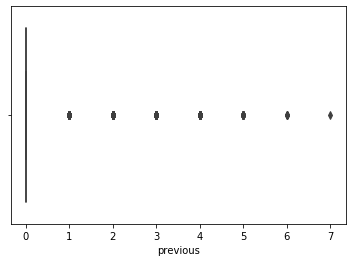

In [13]:
ax = sns.boxplot(x = bank_data_df["previous"])

We can point out that the attributes age,duration, previous and campaign have the most outliers in the dataset.

# Data Preprocessing

Convert the column 'y' from categorical to numeric because it will help me in the future.
1 is 'yes and 0 is 'no'

In [14]:
bank_data_df['y'].replace(['yes', 'no'], [1, 0], inplace = True)
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


For the missing values we are going to use 2 techniques. When the most frequent word has by far more data points we, are going to replace the missing values with the most frequent one. Otherwise we are going to replace the missing values with a random value.

In [15]:
bank_data_df["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [16]:
bank_data_df["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [17]:
bank_data_df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [18]:
bank_data_df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [19]:
bank_data_df["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [20]:
bank_data_df["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

Based on the above, for the job, education and housing attributes we are going to use the second technique and the first technique for the other attributes.

In [21]:
collumn_names_missing_values_list = ["marital", "default", "loan"]

# A function that for every attribute, it replaces every unknown value with the most frequent one. 
def replace_missing_values(collumn_name):
    result_a = bank_data_df[collumn_name].value_counts()
    most_frequent_value = result_a.index[0]
    bank_data_df[collumn_name].replace("unknown", most_frequent_value, inplace = True)

for current_collumn_name in collumn_names_missing_values_list:
    replace_missing_values(current_collumn_name)


In [22]:
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Replace the unknown values of attributes job, education and housing with a random values.

In [26]:
def replace_missing_values_with_random_ones(attribute_name):
    attribute_unique_values_list = bank_data_df[attribute_name].unique().tolist() # Create a list that has all the unique values of the attribute
    attribute_unique_values_list.remove("unknown") # Remove the value unknown from the list
    random_value = random.choice(attribute_unique_values_list) # Pick a random value from the list
    print("Random Value: ", random_value)
    bank_data_df[attribute_name].replace("unknown", random_value, inplace = True)

In [27]:
replace_missing_values_with_random_ones("job")

Random Value:  student


In [28]:
replace_missing_values_with_random_ones("education")

Random Value:  basic.4y


In [29]:
replace_missing_values_with_random_ones("housing")

Random Value:  no


In [30]:
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
